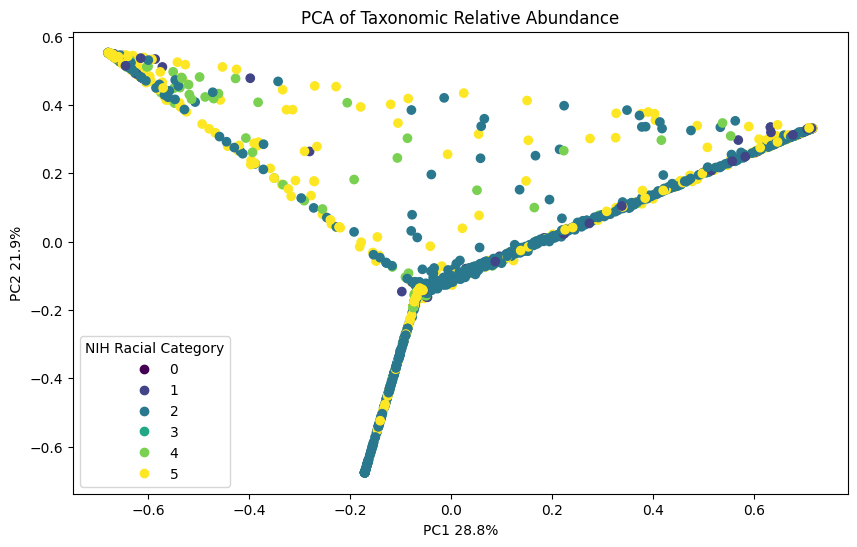

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


metadata = pd.read_csv(r"C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\metadata\metadata.csv")
rel_abun = pd.read_csv(r"C:\Users\Emiliano\Desktop\CodigosTesis\Training\Training\taxonomy\taxonomy_relabd.species.csv")

rel_abun_etn = pd.merge(metadata[['specimen', 'NIH Racial Category']], rel_abun, on='specimen')


data_pca = rel_abun_etn.drop(columns=['specimen', 'NIH Racial Category'])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_pca)


pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2']) 
pca_df['NIH Racial Category'] = rel_abun_etn['NIH Racial Category']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['NIH Racial Category'].astype('category').cat.codes)
plt.title('PCA of Taxonomic Relative Abundance')
plt.xlabel('PC1 28.8%')
plt.ylabel('PC2 21.9%')
plt.legend(*scatter.legend_elements(), title="NIH Racial Category")
plt.show()